In [ ]:
# link aula
# https://www.youtube.com/watch?v=Agft8OtP238

# Modelo CAPM

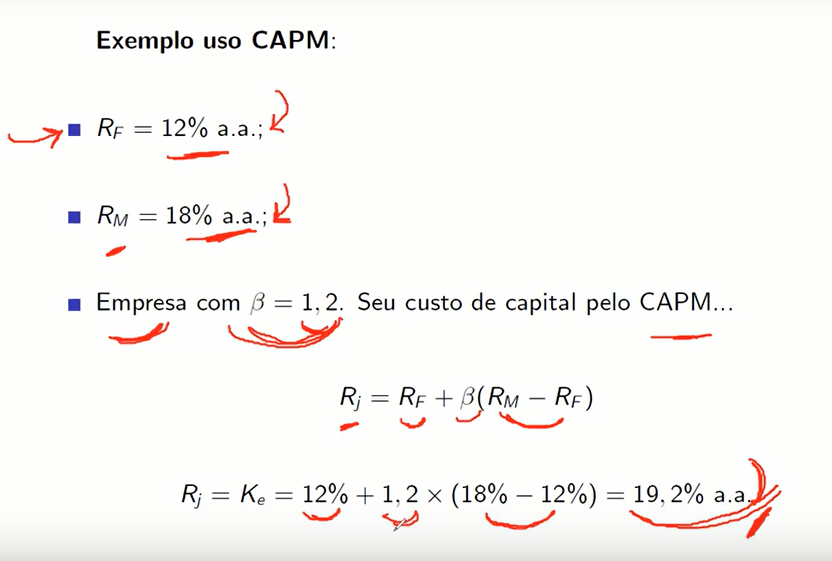

In [106]:
import numpy as np
import pandas as pd
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

In [107]:
# Fetch historical stock data
start_date = '2019-01-01'
end_date = '2020-12-31'

stock_ticker = 'AAPL'

stock_data = yf.download(stock_ticker, start=start_date, end=end_date)[['Adj Close']]
# Calculate daily returns
stock_data[f'{stock_ticker}_returns'] = stock_data['Adj Close'].pct_change()
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,AAPL_returns
Date,,
2019-01-02,37.994492,NaN
2019-01-03,34.209965,-0.099607
2019-01-04,35.670353,0.042689
2019-01-07,35.590965,-0.002226
2019-01-08,36.269436,0.019063


In [108]:
# Fetch market data (e.g., S&P 500 index)
market_ticker = '^GSPC'

market_data = yf.download(market_ticker, start=start_date, end=end_date)
market_data[f'{market_ticker}_returns'] = market_data['Adj Close'].pct_change()
market_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,^GSPC_returns
Date,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,0.007010
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,0.009695
...,...,...,...,...,...,...,...
2020-12-23,3693.419922,3711.239990,3689.280029,3690.010010,3690.010010,3779160000,0.000746
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1883780000,0.003537
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3535460000,0.008723


In [109]:
# Merge stock and market data
merged_data = pd.concat([stock_data.iloc[:,-1], market_data.iloc[:,-1]], axis=1)
merged_data = merged_data.dropna()
merged_data

,AAPL_returns,^GSPC_returns
Date,,
2019-01-03,-0.099607,-0.024757
2019-01-04,0.042689,0.034336
2019-01-07,-0.002226,0.007010
2019-01-08,0.019063,0.009695
2019-01-09,0.016982,0.004098
...,...,...
2020-12-23,-0.006976,0.000746
2020-12-24,0.007712,0.003537
2020-12-28,0.035766,0.008723


In [110]:
# Get risk-free rate (10-year US Treasury bond yield)
risk_free_rate = yf.Ticker('^TNX').history(period='1d').iloc[-1]['Close'] / 100.0
risk_free_rate

0.03690999984741211

In [50]:

# Calculate excess returns
merged_data['Excess Returns'] = merged_data[f'{stock_ticker}_returns'] - risk_free_rate

# Calculate the covariance and variance
covariance = np.cov(merged_data['Excess Returns'], merged_data[f'{market_ticker}_returns'])[0][1]
print(f'covariance: {covariance}')
variance = np.var(merged_data[f'{market_ticker}_returns'])
print(f'variance: {variance}')

# Calculate beta
beta = covariance / variance
print(f'beta: {beta}')


covariance: 0.00031343788620015104
variance: 0.00026643685235943357
beta: 1.1764059041551476


In [51]:
# Calculate the expected return using CAPM formula
expected_return = risk_free_rate + beta * (merged_data[f'{market_ticker}_returns'].mean() - risk_free_rate)
expected_return

-0.00542496911290858

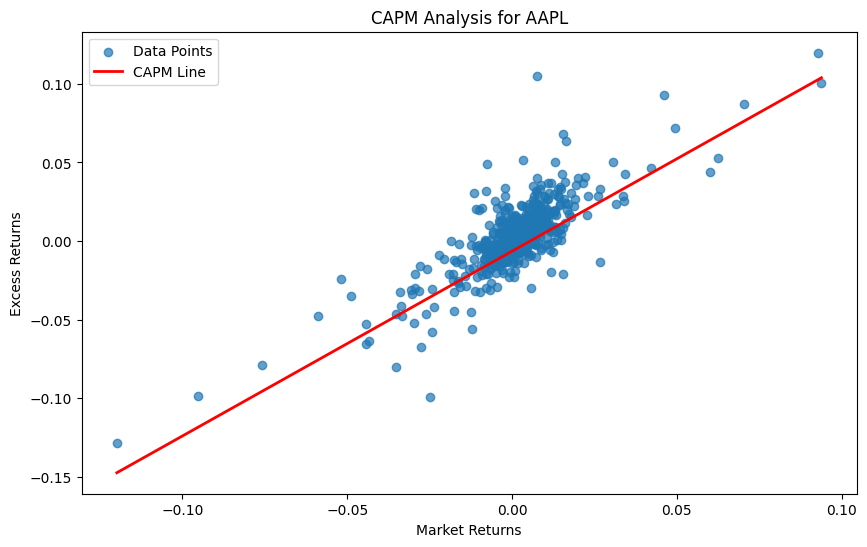

In [52]:
import matplotlib.pyplot as plt

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data[f'{market_ticker}_returns'], merged_data[f'{stock_ticker}_returns'], alpha=0.7, label='Data Points')

# Add the CAPM line
x = np.linspace(merged_data[f'{market_ticker}_returns'].min(), merged_data[f'{market_ticker}_returns'].max(), 100)
y = beta * (x - merged_data[f'{market_ticker}_returns'].mean()) + expected_return
plt.plot(x, y, color='red', linewidth=2, label='CAPM Line')


# Set plot title and labels
plt.title('CAPM Analysis for {}'.format(stock_ticker))
plt.xlabel('Market Returns')
plt.ylabel('Excess Returns')

# Add legend
plt.legend()

# Show the plot
plt.show()

# 3 FAMA FRENCH MODEL - Modelo dos 3 fatores

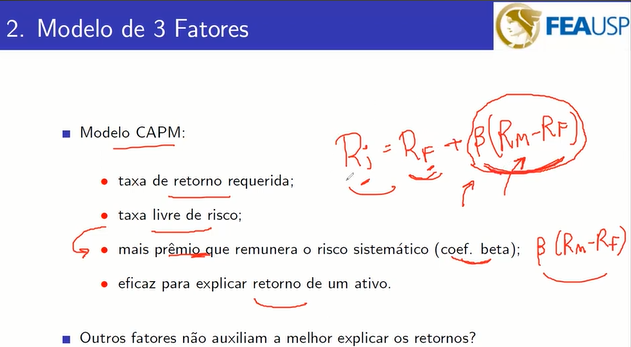

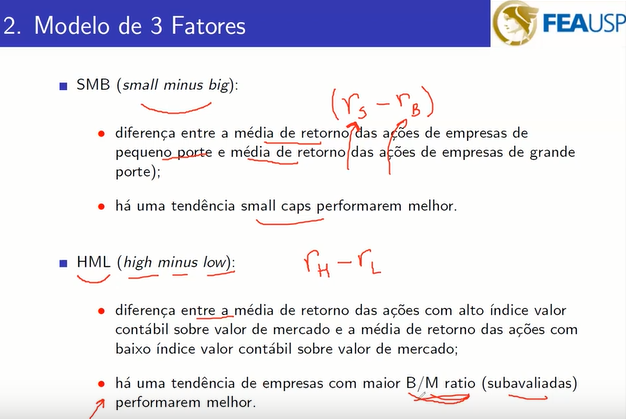

In [166]:
# Base do site: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
factors = pd.read_csv('F-F_Research_Data_Factors_daily.CSV', skiprows=3, skipfooter=1).rename(columns={'Unnamed: 0': 'Date'})
# transformar index no formato "yyyy-mm-dd"
factors['Date'] = pd.to_datetime(factors['Date'], format='%Y%m%d').dt.strftime('%Y-%m-%d').astype(str)
factors = factors.set_index('Date')

factors

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-01,0.10,-0.25,-0.27,0.009
1926-07-02,0.45,-0.33,-0.06,0.009
1926-07-06,0.17,0.30,-0.39,0.009
1926-07-07,0.09,-0.58,0.02,0.009
1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...
2023-04-24,0.00,-0.40,0.47,0.018
2023-04-25,-1.76,-0.99,0.10,0.018
2023-04-26,-0.41,0.15,-0.75,0.018


In [157]:
stock_tickers = ['AAPL', 'GOOGL', 'MSFT']

# Fetch the historical stock data for the specified tickers
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)['Adj Close']
stock_data.index = stock_data.index.strftime('%Y-%m-%d')

[*********************100%***********************]  3 of 3 completed


In [162]:
dates = stock_data.index.tolist()

In [167]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

# Define the risk-free rate
risk_free_rate = 0.05

# Define the start and end dates for data fetching
start_date = '2019-01-01'
end_date = '2020-12-31'

# Define the stock tickers for the companies you're interested in
stock_tickers = ['AAPL', 'GOOGL', 'MSFT']

# Fetch the historical stock data for the specified tickers
stock_data = yf.download(stock_tickers, start=start_date, end=end_date)['Adj Close']
stock_data.index = stock_data.index.strftime('%Y-%m-%d')
dates = stock_data.index.tolist()

# Load the SMB and HML factors data from a CSV file
ff_data = factors
ff_data = factors[factors.index.isin(dates)]

# Extract the SMB and HML factors from the loaded data
smb = ff_data['SMB']
hml = ff_data['HML']

# Calculate excess returns for each stock
excess_returns = stock_data.pct_change() - risk_free_rate

# Prepare the data for the regression
X = pd.concat([ff_data[['Mkt-RF']], smb, hml], axis=1)  # Factors data
X = sm.add_constant(X)  # Add a constant column for the intercept
y = excess_returns[stock_tickers]  # Stock excess returns

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Get the coefficients and intercept from the regression results
beta = results.params['Mkt-RF']  # Market beta
alpha = results.params['const']  # Intercept (alpha)

# Print the results
print(f"Beta: {beta}")
print(f"Alpha: {alpha}")


[*********************100%***********************]  3 of 3 completed


KeyError: 'Mkt-RF'

# Modelo por Encolhimento

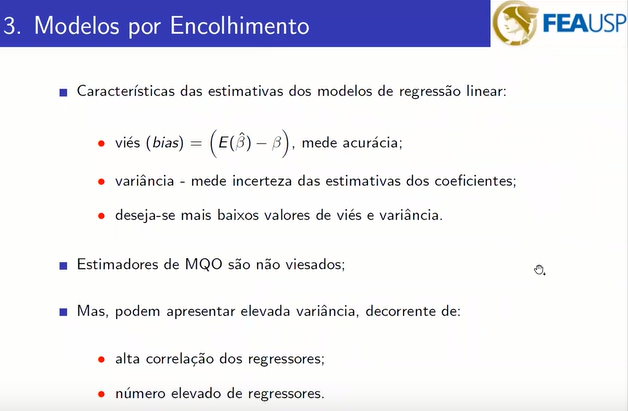

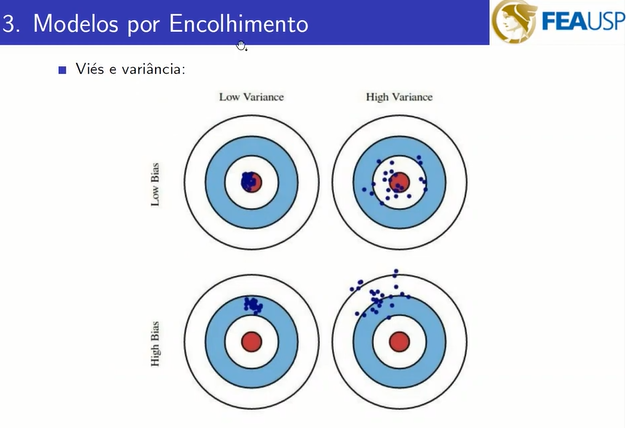

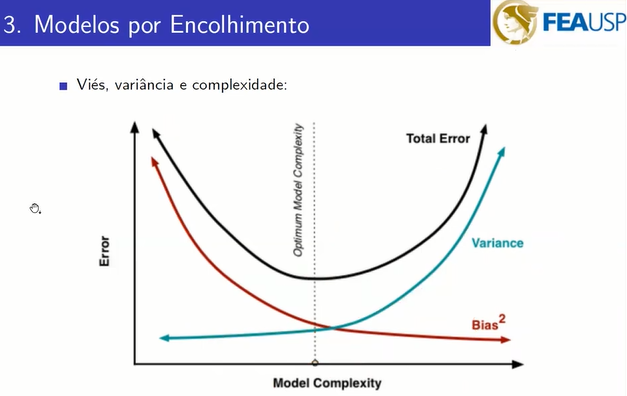